In [33]:
import numpy as np, matplotlib.pyplot as plt
import matplotlib.patches as patches
import astropy.units as u
from astropy.coordinates import SkyCoord


In [162]:
LO_cd = 7300
LO_ho = 7000
LO_wa = -5843
LO_12 = -6000

ny1 = np.array([ 10,512])
ny2 = np.array([512,1024])
ny  = [ny1,ny2] 

rest_freq = 6668

LOs = [LO_cd,LO_ho,LO_wa]

#edge = np.array([6588+32,6652+32])
edge = np.array([6660])

In [163]:
edge-rest_freq

array([-8])

In [164]:
for lo in LOs:
    print([s for s in abs(edge-np.sign(lo)*lo)])

[640]
[340]
[817]


array([-640])

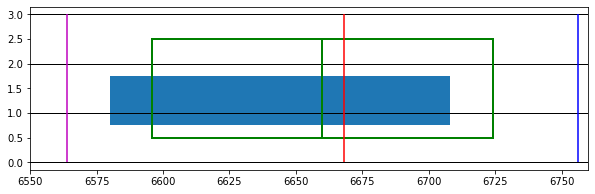

In [168]:
fig, ax = plt.subplots(1,figsize=(10,3))


p = []
for i in range(2):
    for j in range(len(LOs)):
        p.append(patches.Rectangle((min(abs(LOs[j]-ny[i])), j),np.diff(ny[i])[0], 1
                                   ,edgecolor='k',facecolor='none'))
bbc = []
width = 64
up   = -width
down = 0

ud = [down,up]
for j in range(len(edge)):
    for i in range(2):
        bbc.append(patches.Rectangle((edge[j]+ud[i], 0.5),width,2
                            ,edgecolor='g',lw=2
                            ,facecolor='none'))

old = patches.Rectangle((6580,0.75),128,1)        
ax.add_patch(old)

# Add the patch to the Axes
for pat in p:
    ax.add_patch(pat);

for b in bbc:#[2:]:
    ax.add_patch(b)
    
ax.vlines(x=6668,ymin=0,ymax=3,color='r',label='Maser')
ax.vlines(x=6564,ymin=0,ymax=3,color='m',label='')
ax.vlines(x=6756,ymin=0,ymax=3,color='b',label='')

ax.set_xlim(6550,6760)

(edge-LO_cd)
#(edge+LO_12)

In [146]:
(edge[0]-64+np.arange(0,8)*32)-6000

array([588, 620, 652, 684, 716, 748, 780, 812])

# Doppler Shift

In [150]:
t_sun = 2*np.pi*(np.arange(0.01,1,0.001) - 0.2179)
X = np.cos(t_sun)
Y = np.sin(t_sun)*np.cos(23.44/57.3)
Z = np.sin(t_sun)*np.sin(23.44/57.3)

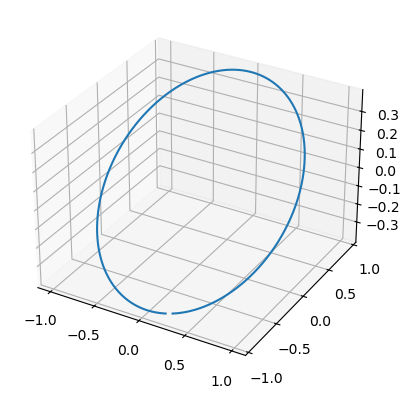

In [151]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(X,Y,Z)

In [152]:
c = SkyCoord("11:00:00 -60:00:00",unit=(u.hourangle,u.deg))

t = np.arange(0,365,1)/365

vr_sun = 20*(np.cos(270/57.3)*np.cos(30/57.3)*np.cos(c.ra.radian)*np.cos(c.dec.radian)+
             np.sin(270/57.3)*np.cos(30/57.3)*np.sin(c.ra.radian)*np.cos(c.dec.radian)+
             np.sin(30/57.3)*np.sin(c.dec.radian))

vr_e = 30*np.cos(c.geocentricmeanecliptic.lat.radian)*np.sin(2*np.pi*(t-0.2179)-c.geocentricmeanecliptic.lon.radian)


In [155]:
vr_sun,vr_e[0]

(-10.89826041521899, 15.554140117141793)

In [146]:
from datetime import datetime

istart = '2024y002d13h45m00s'
datetime.strptime(istart,'%Yy%jd%Hh%Mm%Ss').timetuple().tm_yday


2

In [147]:
datetime.strptime(istart,'%Yy%jd%Hh%Mm%Ss').timetuple()

time.struct_time(tm_year=2024, tm_mon=1, tm_mday=2, tm_hour=13, tm_min=45, tm_sec=0, tm_wday=1, tm_yday=2, tm_isdst=-1)

In [149]:
datetime.now().strftime('%Yy%jd%Hh%Mm%Ss')

'2024y102d09h53m09s'